# 1. Cargando datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lectura de datos en python
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Explorando datos

In [4]:
# qué columnas tienen los datos?
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# qué tamaño tienen los datos?
train.shape

(891, 12)

In [6]:
# hay valores nulos en los datos?
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# cómo se distribuyen las variables numericas?
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# cómo se comportan las variables categoricas?
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


## 2.1 EDA: Estudio de variable target

In [9]:
train.groupby(['Survived']).count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64


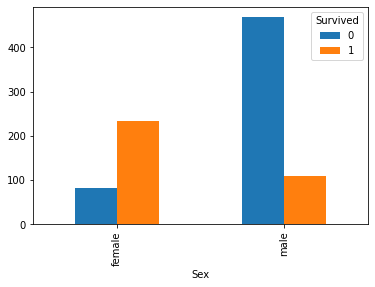

In [10]:
grouped_sex = train.groupby(['Survived', 'Sex']).count()['PassengerId']
print(grouped_sex)
(grouped_sex.unstack(level=0).plot.bar())
plt.show()

# 3. Procesamiento de datos

In [14]:
train[['Survived', 'Sex', 'Age', 'Pclass']].head(3)

,Survived,Sex,Age,Pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3


In [15]:
train[['Survived', 'Sex', 'Age', 'Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [23]:
# mirar como se distribuyen los datos nulos en variable edad
(train[train['Age'].isna()]
     .groupby(['Sex', 'Pclass'])
     .count()['PassengerId']
     .unstack(level=0))

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


In [24]:
(train[train['Age'].isna()]
     .groupby(['SibSp', 'Parch'])
     .count()['PassengerId']
     .unstack(level=0))

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


In [25]:
# Mediana de edad
train['Age'].median()

28.0

In [26]:
# imputar valor para rellenar nulos
train['Age'] = train['Age'].fillna(28.0)
train[['Survived', 'Sex', 'Age', 'Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


In [27]:
# map para label encoding
train['Sex'] = train['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [29]:
train[['Survived', 'Sex', 'Age', 'Pclass']].head(3)

,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3


## 3.1 Crear nuevas variables

In [30]:
# crear nueva variable tipo flag "solo"
train['FlagSolo'] = np.where(
    (train['SibSp'] == 0) & (train['Parch'] == 0), 1, 0)

Survived  FlagSolo
0         0           175
          1           374
1         0           179
          1           163
Name: PassengerId, dtype: int64


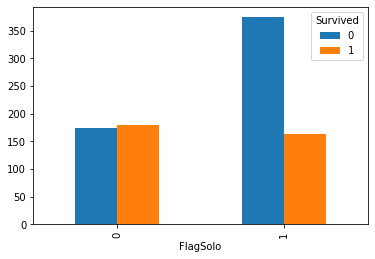

In [31]:
grouped_flag = train.groupby(['Survived', 'FlagSolo']).count()['PassengerId']
print(grouped_flag)
(grouped_flag.unstack(level=0).plot.bar())
plt.show()

In [32]:
train[['Survived', 'Sex', 'Age', 'Pclass', 'FlagSolo']].head(3)

,Survived,Sex,Age,Pclass,FlagSolo
0,0,0,22.0,3,0
1,1,1,38.0,1,0
2,1,1,26.0,3,1


In [33]:
# variables dependientes
y_train = train['Survived']

# preprocesamiento de variables independientes
features = ['Sex', 'Age', 'Pclass', 'FlagSolo']
x_train = train[features]

print(y_train.shape, x_train.shape)

(891,) (891, 4)


# 4. Modelos

In [34]:
# modelo regresion logistica
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [35]:
# modelo arboles de decision
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

# 5. Evaluación

In [38]:
from sklearn.metrics import plot_confusion_matrix

def conf_mat_acc(modelo):
    disp = plot_confusion_matrix(modelo, x_train, y_train, cmap=plt.cm.Blues, values_format="d")
    true_pred = disp.confusion_matrix[0,0] + disp.confusion_matrix[1,1]
    total_data = sum(disp.confusion_matrix)
    accurracy = true_pred/total_data
    print('accurracy: ', np.round(accurracy, 2))
    plt.show()

accurracy:  [1.28 2.06]


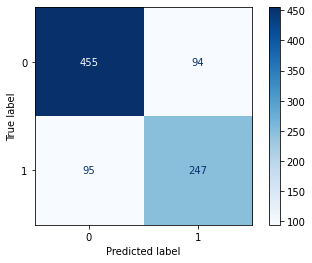

In [39]:
conf_mat_acc(logreg)

accurracy:  [1.29 2.91]


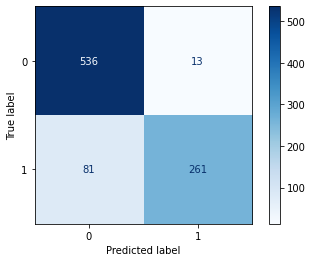

In [40]:
conf_mat_acc(decision_tree)

## 5.1 Evaluacion sobre el test set

In [41]:
print(test.head(3))
test.info()

   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 no

In [42]:
# preparando test set
test['Sex'] = test['Sex'].map({'female': 1, 'male': 0}).astype(int)

test['Age'] = test['Age'].fillna(28.0)

test['FlagSolo'] = np.where(
    (test['SibSp'] == 0) & (test['Parch'] == 0), 1, 0)

In [43]:
print(test.info())
test[features].head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  FlagSolo     418 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB
None


,Sex,Age,Pclass,FlagSolo
0,0,34.5,3,1
1,1,47.0,3,0
2,0,62.0,2,1


In [45]:
x_test = test[features]
print(x_test.shape)

(418, 4)


In [46]:
y_pred_log = logreg.predict(x_test)
y_pred_tree = decision_tree.predict(x_test)
print(y_pred_log[0:10])

[0 0 0 0 1 0 1 0 1 0]


# 6. Predicción

In [47]:
print(y_pred_log[0:20])
print(y_pred_tree[0:20])

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0]
[0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0]


In [51]:
# para descargar en ordenador
def download_output(y_pred, name):
  output = pd.DataFrame({'PassengerId': test.PassengerId, 
                         'Survived': y_pred})
  output.to_csv('data/' + name, index=False)

In [53]:
download_output(y_pred_log, 'ana_pred_log.csv')
download_output(y_pred_tree, 'ana_pred_tree.csv')